# Midterm project

We are giving you a dataset and asking you to create a model to make predictions.
This assignment is less structured than the previous ones.  It is intended to be similar to what a potential
employer would give you to evaluate your skills.

So: time to show off ! Use the knowledge you have acquired in the first 7 weeks of the course to create a Jupyter notebook that presents your work (and you) in the best light.

As usual, a "correct answer" (e.g., highly predictive model) is only part of the goal.
Your entire research methodology should be evident, as per the "Recipe for ML" we have discussed in class.


# The problem

You are given a dataset of customers who have applied for credit.
Each customer is associated with some number of attributes, and a rating of being a Good/Bad credit risk.

## The dataset

- The dataset is given in the file "credit_data.csv".
- Each row corresponds to one customer.
- There are 20 attributes, some numeric and some categorical.
- The last column "Credit Risk" encodes whether the customer was judged to be a Good/Bad credit risk
    - 1: Good credit risk
    - 2: Bad credit risk

You will use this data to come up with a model that predicts "Credit Risk" for a customer from the customer's attributes.

### Attributes

A description of the attributes is given in the plain text file "credit_data_attributes.txt".

You will notice that the values for many attributes are encoded as strings.
For example, attribute 7 is the customer's Employment Status, having possible values
A71, A72, .., A75.  Per the file, "A71" means the customer is unemployed.

#### Currency

The currency units are "DM" (old German currency: the Deutsche Mark).

As you might guess: this data is not recent; you may find anachronisms other than the currency.

## Take a look at features. There are twenty features.

In [129]:
import pandas as pd
import numpy as np
import os

train_data=pd.read_csv("data/credit_data.csv")
train_data.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Attribute 16,Attribute 17,Attribute 18,Attribute 19,Attribute 20,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## To be clearer, I change the features's name to their real meanings.

In [130]:
train_data.rename(columns={'Attribute 1' : 'Checking account','Attribute 2' : 'Duration month','Attribute 3' : 'Credit history',
                           'Attribute 4' : 'Purpose','Attribute 5' : 'Credit amount','Attribute 6' : 'Savings', 
                           'Attribute 7' : 'Present employment','Attribute 8' : 'Installment rate','Attribute 9' : 'Status and sex',
                           'Attribute 10' : 'Other debtors / guarantors','Attribute 11' : 'Present residence','Attribute 12' : 'Property',
                           'Attribute 13' : 'Age','Attribute 14' : 'Other installment plans','Attribute 15' : 'Housing',
                           'Attribute 16' : 'Existing credits','Attribute 17' : 'Job','Attribute 18' : 'Number of people being liable',
                           'Attribute 19' : 'Telephone','Attribute 20' : 'Foreign worker'}, inplace = True)
train_data.head()

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings,Present employment,Installment rate,Status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Existing credits,Job,Number of people being liable,Telephone,Foreign worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## There is the description of data. We can see that there is no missing values.

In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Checking account                 1000 non-null object
Duration month                   1000 non-null int64
Credit history                   1000 non-null object
Purpose                          1000 non-null object
Credit amount                    1000 non-null int64
Savings                          1000 non-null object
Present employment               1000 non-null object
Installment rate                 1000 non-null int64
Status and sex                   1000 non-null object
Other debtors / guarantors       1000 non-null object
Present residence                1000 non-null int64
Property                         1000 non-null object
Age                              1000 non-null int64
Other installment plans          1000 non-null object
Housing                          1000 non-null object
Existing credits                 1000 non-null int64
Job                              100

In [132]:
num_features = ["Duration month", "Credit amount", "Installment rate", 
               "Present residence","Age","Existing credits","Number of people being liable"]
cal_features=["Checking account","Credit history","Purpose","Savings",
              "Present employment","Status and sex","Other debtors / guarantors",
              "Property","Other installment plans","Housing","Job","Telephone","Foreign worker"]

## There is the description of all numeric features. To eliminate the effects of scale, I need to rescale them.

In [133]:
train_data.describe()

,Duration month,Credit amount,Installment rate,Present residence,Age,Existing credits,Number of people being liable,Credit Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## To use pipeline, I transfer the string to number in categorical features

In [134]:
def caltoint(df,cal_features):
    for i in range(0,len(cal_features)):
        val=df.loc[:,cal_features[i]].unique()
        for j in range(0,len(val)):
            df.loc[df[cal_features[i]]==val[j],cal_features[i]]=j
    return df
X_train=caltoint(train_data.iloc[:,:-1],cal_features)
X_train.head()

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings,Present employment,Installment rate,Status and sex,Other debtors / guarantors,Present residence,Property,Age,Other installment plans,Housing,Existing credits,Job,Number of people being liable,Telephone,Foreign worker
0,0,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0
1,1,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0
2,2,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0
3,0,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0
4,0,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0


## I use MinMaxScaler to rescale data

In [135]:
from sklearn.preprocessing import MinMaxScaler
for item in num_features:
    X_train.loc[:,item]=MinMaxScaler().fit_transform(X_train.loc[:,item].astype('float').values.reshape((-1, 1)))
X_train.head()

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings,Present employment,Installment rate,Status and sex,Other debtors / guarantors,Present residence,Property,Age,Other installment plans,Housing,Existing credits,Job,Number of people being liable,Telephone,Foreign worker
0,0,0.029412,0,0,0.050567,0,0,1.000000,0,0,1.000000,0,0.857143,0,0,0.333333,0,0.0,0,0
1,1,0.647059,1,0,0.313690,1,1,0.333333,1,0,0.333333,0,0.053571,0,0,0.000000,0,0.0,1,0
2,2,0.117647,0,1,0.101574,1,2,0.333333,0,0,0.666667,0,0.535714,0,0,0.000000,1,1.0,1,0
3,0,0.558824,1,2,0.419941,1,2,0.333333,0,1,1.000000,1,0.464286,0,1,0.000000,0,1.0,1,0
4,0,0.294118,2,3,0.254209,1,1,0.666667,0,0,1.000000,2,0.607143,0,1,0.333333,0,1.0,1,0


In [136]:
y_train=np.array(train_data.loc[:,"Credit Risk"])
y_train.shape

(1000,)

## After rescalor, I need to select important features, since there are so many features.
## I used RandomForestClassifier to select important features by their gini scores.

In [137]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,n_jobs= -1 ,random_state=0)
RFC.fit(X_train,y_train)
import_level = RFC.feature_importances_
index = np.argsort(import_level)[::-1]
index

array([ 4,  0, 12,  1,  2,  3,  6,  5, 10, 11,  7,  8, 16, 14, 13, 15, 18,
        9, 17, 19], dtype=int64)

## Here are histogram of features importance

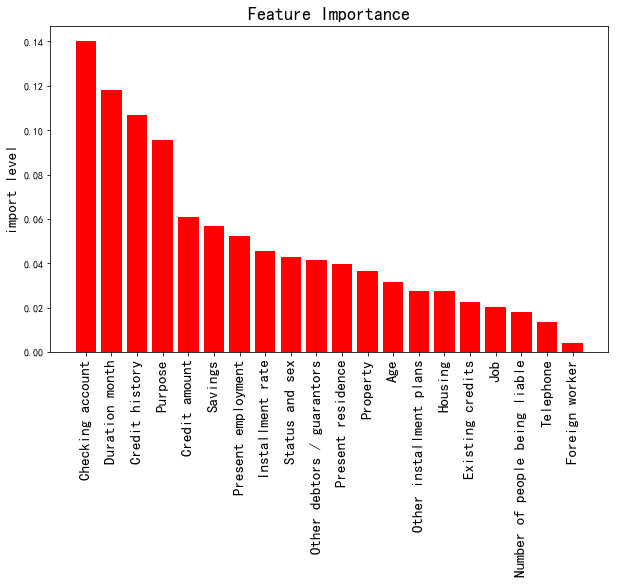

In [138]:
import matplotlib.pyplot as plt
x_columns = train_data.columns[:-1]
plt.figure(figsize=(10,6))
plt.title('Feature Importance',fontsize = 18)
plt.ylabel('import level',fontsize = 15,rotation = 90)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
for i in range(x_columns.shape[0]):
    plt.bar(i,import_level[index[i]],color = 'red',align = 'center')
    plt.xticks(np.arange(x_columns.shape[0]),x_columns,rotation = 90,fontsize = 15)


## Here are the values of features importance

In [139]:
print("The important level of")
for each in range(X_train.shape[1]):
    print(x_columns[each]+ ':      '+ str(import_level[index[each]]))

The important level of
Checking account:      0.1400783155226069
Duration month:      0.11799221162699004
Credit history:      0.10682943185117172
Purpose:      0.09545929097057712
Credit amount:      0.06100176497095757
Savings:      0.05659289840799419
Present employment:      0.05230916562428683
Installment rate:      0.04548117755457917
Status and sex:      0.042633372579666685
Other debtors / guarantors:      0.04136319883647085
Present residence:      0.03948671747006202
Property:      0.0364959264030821
Age:      0.03141480226134662
Other installment plans:      0.027667540127786258
Housing:      0.02747548362501513
Existing credits:      0.02230367836984267
Job:      0.020353084078643384
Number of people being liable:      0.017797811646398657
Telephone:      0.013335831492652028
Foreign worker:      0.003928296579870168


## I use the features whose importance is bigger than the mean imporance

In [140]:
featuresel=np.array(import_level>=import_level.mean())
realfeatures=X_train.columns[featuresel]
realfeatures

Index(['Checking account', 'Duration month', 'Credit history', 'Purpose',
       'Credit amount', 'Present employment', 'Age'],
      dtype='object')

## I used pipelines to deal with categorical and numerical features. Through pipelines, I transform X_train dataframe to numpy ndarray.

In [141]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder# A class to select numerical or categorical columns
from sklearn.pipeline import FeatureUnion
# since Scikit-Learn doesn't handle DataFrames yet
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
num_features = ["Duration month", "Credit amount", "Age"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),("imputer", 
                                                           SimpleImputer(strategy="median")),])

In [142]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
    
cat_features = ["Checking account", "Credit history", "Purpose","Present employment"]
cat_pipeline = Pipeline([("select_cat", DataFrameSelector( cat_features )),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse=False))])

In [143]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline",
                                                                                     cat_pipeline),])
X = preprocess_pipeline.fit_transform(X_train)

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Therefore, we get our final training data, which is x, and final target data, which is y_train.

## Before choosing model, I selects the baseline model.

In [144]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
strats = { "stratified": {},"uniform": {},"constant": {"constant": 1}}
plt_num = 1
# Compute Accuracy for various baseline classifiers
for strat, args in strats.items():
    dmy_clf = DummyClassifier(strategy=strat, **args)
    print(dmy_clf)
    acc_scores_dmy = cross_val_score(dmy_clf, X, y_train,scoring="accuracy",cv=5)
    SCORE_BASELINE=acc_scores_dmy.mean()
    print("{s}: SCORE_BASELINE = {a:.2f}".format(s=strat, a=SCORE_BASELINE))

DummyClassifier(constant=None, random_state=None, strategy='stratified')
stratified: SCORE_BASELINE = 0.59
DummyClassifier(constant=None, random_state=None, strategy='uniform')
uniform: SCORE_BASELINE = 0.50
DummyClassifier(constant=1, random_state=None, strategy='constant')
constant: SCORE_BASELINE = 0.70


## We can see that when the constant model is the best when it always predicts credit risk 1.

## Then I use logistic regression to predict at first. We can see that the cross_val_score is 0.739. 

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
clf = LogisticRegression(C=200. / len(X),solver='saga', tol=0.0001)
SCORE_1 = cross_val_score(clf, X, y_train,scoring="accuracy",cv=5).mean()
SCORE_1

0.739

## Then I calculate confusion matrix and make a picture.

In [146]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
    # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        print("Normalized confusion matrix") 
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # - coordinates are (horizontal offset, vertical offset)
        # - so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn.metrics import confusion_matrix
y_pred=cross_val_predict(clf, X, y_train,cv=5)
conf_mx=confusion_matrix(y_train,y_pred)
print(conf_mx)

[[635  65]
 [196 104]]


Confusion matrix, without normalization


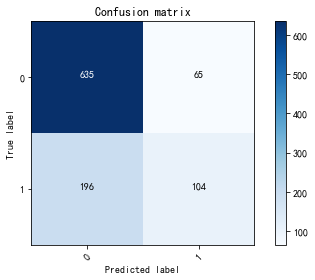

In [147]:
plot_confusion_matrix(conf_mx, range(2))

Normalized confusion matrix


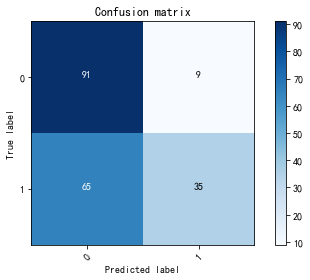

In [148]:
plot_confusion_matrix(conf_mx, range(2),normalize=True)

## We can see that for credit risk 1, our prediction is really good. However, for credit risk 2, our predition performs badly.

## Maybe I can try another model. I use random forest model to predict. Since this is classificaiton problem, I make the max_features equal to sqrt of total features.

In [149]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestClassifier  
import math

from sklearn.datasets import load_iris  
rf=RandomForestClassifier(n_estimators=100,max_features=round(math.sqrt(X.shape[1])), max_depth=None,min_samples_split=2, random_state=0)
rf.fit(X,y_train)
SCORE_2 = cross_val_score(rf, X, y_train,scoring="accuracy",cv=5).mean()
SCORE_2

0.755

## We  can see that final score is 0.755, whichi is better than logistic regression.

[[621  79]
 [166 134]]
Normalized confusion matrix


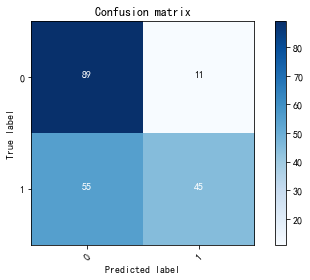

In [150]:
y_pred=cross_val_predict(rf, X, y_train,cv=5)
conf_mx=confusion_matrix(y_train,y_pred)
print(conf_mx)
plot_confusion_matrix(conf_mx, range(2),normalize=True)

## We can see that prediction for credit risk 2 is much better although the prediciton for credit risk 1 is a little worse. There is some trade off between two predictions.

## For higher accuracy, I choose random forest model.
## Below are credit_medel.predict

In [151]:
class credit_model(object):
    def __init__(self, X_train, y_train): #X_train is dataframe, y_train is ndarray
        self.X_train = X_train
        self.y_train = y_train
    def predict(self):
        from sklearn.base import BaseEstimator, TransformerMixin
        from sklearn.preprocessing import OneHotEncoder# A class to select numerical or categorical columns
        from sklearn.pipeline import FeatureUnion
        # since Scikit-Learn doesn't handle DataFrames yet
        from sklearn.pipeline import Pipeline
        class DataFrameSelector(BaseEstimator, TransformerMixin):
            def __init__(self, attribute_names):
                self.attribute_names = attribute_names
            def fit(self, X, y=None):
                return self
            def transform(self, X):
                return X[self.attribute_names]
    
        try:
            from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
        except ImportError:
            from sklearn.preprocessing import Imputer as SimpleImputer
    
        num_features = ["Duration month", "Credit amount", "Age"]
        num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),("imputer", 
                                                           SimpleImputer(strategy="median")),])

        class MostFrequentImputer(BaseEstimator, TransformerMixin):
            def fit(self, X, y=None):
                self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
                return self
            def transform(self, X, y=None):
                return X.fillna(self.most_frequent_)
    
        cat_features = ["Checking account", "Credit history", "Purpose","Present employment"]
        cat_pipeline = Pipeline([("select_cat", DataFrameSelector( cat_features )),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse=False))])
        from sklearn.pipeline import FeatureUnion
        preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline",
                                                                                     cat_pipeline),])
        X = preprocess_pipeline.fit_transform(self.X_train)
        from sklearn.tree import DecisionTreeRegressor  
        from sklearn.ensemble import RandomForestClassifier  
        import math
        from sklearn.datasets import load_iris  
        rf=RandomForestClassifier(n_estimators=100,max_features=round(math.sqrt(X.shape[1])), max_depth=None,min_samples_split=2, random_state=0)
        rf.fit(X,self.y_train)
        y_pred=cross_val_predict(rf, X, self.y_train,cv=5)
        return y_pred
    

## Here is our prediction array.

In [152]:
exp=credit_model(X_train,y_train)
exp.predict()

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,

## Thanks for you reviewing! 
## Have a nice day!